In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#先看一下训练集中男女生存情况
survival_male = len(data_train[data_train['Sex']=='male'][data_train['Survived']==1])/len(data_train[data_train['Sex']=='male'])
survival_femal = len(data_train[data_train['Sex']=='female'][data_train['Survived']==1])/len(data_train[data_train['Sex']=='female'])
print(survival_male,survival_femal)

0.18890814558058924 0.7420382165605095


C:\Windows\Temp\ipykernel_5796\2984335521.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survival_male = len(data_train[data_train['Sex']=='male'][data_train['Survived']==1])/len(data_train[data_train['Sex']=='male'])
C:\Windows\Temp\ipykernel_5796\2984335521.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survival_femal = len(data_train[data_train['Sex']=='female'][data_train['Survived']==1])/len(data_train[data_train['Sex']=='female'])


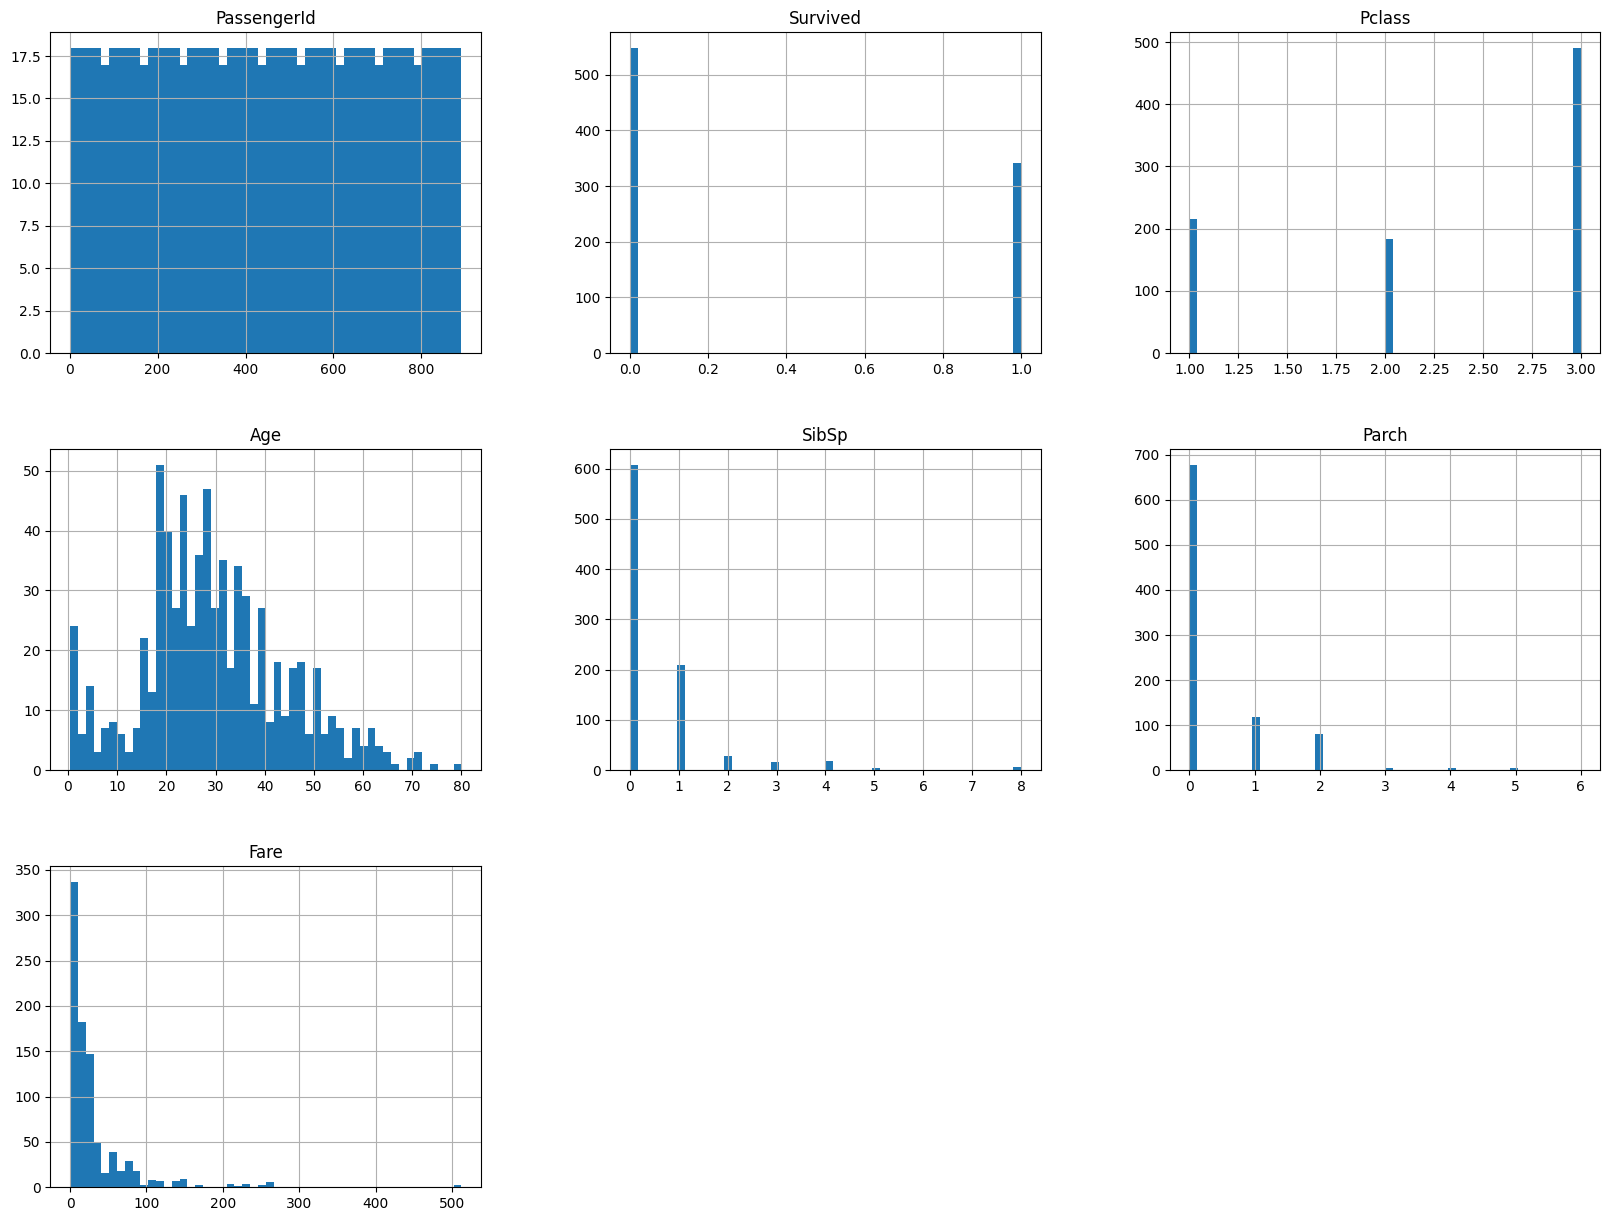

In [12]:
p = data_train.hist(figsize=(20, 15), bins=50)

可以看出男性生存比例远低于女性，男性生存率不到20%，而女性生存率却接近75%。

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y = data_train['Survived']
features = ['Pclass','Sex','SibSp','Parch','Fare']   #这五个变量没有缺失值
X = data_train[features]
model_1 = RandomForestClassifier(n_estimators=100,random_state=0)
X = pd.get_dummies(X,drop_first=True)  #将性别转化为0/1
X_test = data_test[features]
X_test = pd.get_dummies(X_test,drop_first=True)  #将性别转化为0/1
model_1.fit(X,y)
predictions = model_1.predict(X_test)
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

    feature  importance
4  Sex_male    0.593594
0    Pclass    0.282089
2     Parch    0.043693
1     SibSp    0.043476
3      Fare    0.037148


<Axes: title={'center': 'Feature Importance'}, ylabel='feature'>

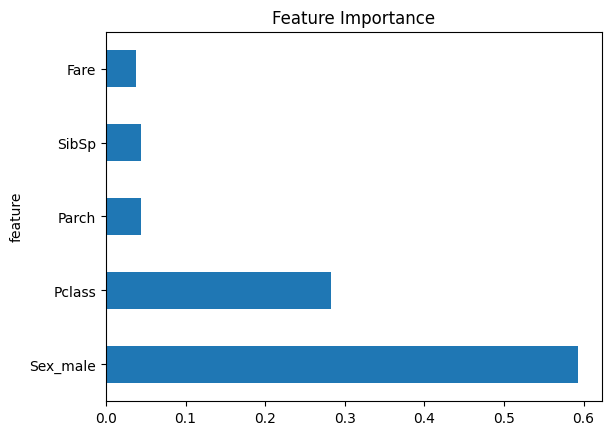

In [18]:
from xgboost import XGBClassifier
model_2 = XGBClassifier(n_estimators=100,random_state=0)
model_2.fit(X,y)
predictions = model_2.predict(X_test)
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('submission_xgbc.csv', index=False)
importance = pd.DataFrame({
    'feature': X.columns, 
    'importance': model_2.feature_importances_ 
}).sort_values('importance', ascending=False)
print(importance)
importance.plot(x='feature', y='importance', kind='barh', legend=False, title='Feature Importance')

In [20]:
from xgboost import XGBClassifier
y = data_train['Survived']
features = ['Pclass','Sex']   #这五个变量没有缺失值
X = data_train[features]
X = pd.get_dummies(X,drop_first=True)  #将性别转化为0/1
X_test = data_test[features]
X_test = pd.get_dummies(X_test,drop_first=True)  #将性别转化为0/1
model_3 = XGBClassifier(n_estimators=100,random_state=0)
model_3.fit(X,y)
predictions = model_3.predict(X_test)
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('submission_xgbc_2.csv', index=False)